In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import collections
import copy
import sys
sys.stdout.flush()

from processing_functions import *

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
jkw10 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][:10,:10]
jkw15 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][:15,:15]
jkw20 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][:20,:20]
jkw25 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][:25,:25]
jkw30 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][:30,:30]
jkw35 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][:35,:35]

jkd10 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][10:20,10:20]
jkd15 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][15:30,15:30]
jkd20 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][20:40,20:40]
jkd25 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][25:50,25:50]
jkd30 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][30:60,30:60]
jkd35 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][35:70,35:70]

jkv10 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][20:30,20:30]
jkv15 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][30:45,30:45]
jkv20 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][40:60,40:60]
jkv25 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][50:75,50:75]
jkv30 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][60:90,60:90]
jkv35 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][70:105,70:105]

jkc20 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][30:50,30:50]
jkc25 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][45:70,45:70]
jkc30 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][60:90,60:90]
jkc35 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][75:110,75:110]
jkc40 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][90:130,90:130]
jkc50 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][105:155,105:155]

jka20 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][50:70,50:70]
jka25 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][70:95,70:95]
jka30 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][90:120,90:120]
jka35 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][110:145,110:145]
jka40 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][130:170,130:170]
jka50 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][155:205,155:205]

jkr20 = np.load('Run_binning_test/jk_20p5_90.npz')['jkcov'][70:90,70:90]
jkr25 = np.load('Run_binning_test/jk_20p5_120.npz')['jkcov'][95:120,95:120]
jkr30 = np.load('Run_binning_test/jk_20p5_150.npz')['jkcov'][120:150,120:150]
jkr35 = np.load('Run_binning_test/jk_20p5_180.npz')['jkcov'][145:180,145:180]
jkr40 = np.load('Run_binning_test/jk_20p5_210.npz')['jkcov'][170:210,170:210]
jkr50 = np.load('Run_binning_test/jk_20p5_255.npz')['jkcov'][205:255,205:255]

In [3]:
realw10 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,:10].T)
realw15 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,:15].T)
realw20 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,:20].T)
realw25 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,:25].T)
realw30 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,:30].T)
realw35 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,:35].T)

reald10 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,10:20].T)
reald15 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,15:30].T)
reald20 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,20:40].T)
reald25 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,25:50].T)
reald30 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,30:60].T)
reald35 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,35:70].T)

realv10 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,20:30].T)
realv15 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,30:45].T)
realv20 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,40:60].T)
realv25 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,50:75].T)
realv30 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,60:90].T)
realv35 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,70:105].T)

realc20 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,30:50].T)
realc25 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,45:70].T)
realc30 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,60:90].T)
realc35 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,75:110].T)
realc40 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,90:130].T)
realc50 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,105:155].T)

reala20 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,50:70].T)
reala25 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,70:95].T)
reala30 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,90:120].T)
reala35 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,110:145].T)
reala40 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,130:170].T)
reala50 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,155:205].T)

realr20 = np.cov(np.load('Run_binning_test/fidreal_20p5_90.npz')['func'][:,70:90].T)
realr25 = np.cov(np.load('Run_binning_test/fidreal_20p5_120.npz')['func'][:,95:120].T)
realr30 = np.cov(np.load('Run_binning_test/fidreal_20p5_150.npz')['func'][:,120:150].T)
realr35 = np.cov(np.load('Run_binning_test/fidreal_20p5_180.npz')['func'][:,145:180].T)
realr40 = np.cov(np.load('Run_binning_test/fidreal_20p5_210.npz')['func'][:,170:210].T)
realr50 = np.cov(np.load('Run_binning_test/fidreal_20p5_255.npz')['func'][:,205:255].T)

In [4]:
def no_zeros(cov):
    for i in range(len(cov)):
        for j in range(len(cov)):
            if np.abs(cov[i,j])<1e-17:
                cov[i,j] = 0
    idx = np.nonzero(cov.diagonal())[0]
    return cov[idx][:,idx], idx

In [5]:
covw10, nziw10 = no_zeros(jkw10+realw10)
covw15, nziw15 = no_zeros(jkw15+realw15)
covw20, nziw20 = no_zeros(jkw20+realw20)
covw25, nziw25 = no_zeros(jkw25+realw25)
covw30, nziw30 = no_zeros(jkw30+realw30)
covw35, nziw35 = no_zeros(jkw35+realw35)
covd10, nzid10 = no_zeros(jkd10+reald10)
covd15, nzid15 = no_zeros(jkd15+reald15)
covd20, nzid20 = no_zeros(jkd20+reald20)
covd25, nzid25 = no_zeros(jkd25+reald25)
covd30, nzid30 = no_zeros(jkd30+reald30)
covd35, nzid35 = no_zeros(jkd35+reald35)
covv10, nziv10 = no_zeros(jkv10+realv10)
covv15, nziv15 = no_zeros(jkv15+realv15)
covv20, nziv20 = no_zeros(jkv20+realv20)
covv25, nziv25 = no_zeros(jkv25+realv25)
covv30, nziv30 = no_zeros(jkv30+realv30)
covv35, nziv35 = no_zeros(jkv35+realv35)
covc20, nzic20 = no_zeros(jkc20+realc20)
covc25, nzic25 = no_zeros(jkc25+realc25)
covc30, nzic30 = no_zeros(jkc30+realc30)
covc35, nzic35 = no_zeros(jkc35+realc35)
covc40, nzic40 = no_zeros(jkc40+realc40)
covc50, nzic50 = no_zeros(jkc50+realc50)
cova20, nzia20 = no_zeros(jka20+reala20)
cova25, nzia25 = no_zeros(jka25+reala25)
cova30, nzia30 = no_zeros(jka30+reala30)
cova35, nzia35 = no_zeros(jka35+reala35)
cova40, nzia40 = no_zeros(jka40+reala40)
cova50, nzia50 = no_zeros(jka50+reala50)
covr20, nzir20 = no_zeros(jkr20+realr20)
covr25, nzir25 = no_zeros(jkr25+realr25)
covr30, nzir30 = no_zeros(jkr30+realr30)
covr35, nzir35 = no_zeros(jkr35+realr35)
covr40, nzir40 = no_zeros(jkr40+realr40)
covr50, nzir50 = no_zeros(jkr50+realr50)

In [6]:
invcovw10 = inv_cov(covw10,rcond=1e-4)
invcovw15 = inv_cov(covw15,rcond=1e-4)
invcovw20 = inv_cov(covw20,rcond=1e-4)
invcovw25 = inv_cov(covw25,rcond=1e-4)
invcovw30 = inv_cov(covw30,rcond=1e-4)
invcovw35 = inv_cov(covw35,rcond=1e-4)
invcovd10 = inv_cov(covd10,rcond=1e-4)
invcovd15 = inv_cov(covd15,rcond=1e-4)
invcovd20 = inv_cov(covd20,rcond=1e-4)
invcovd25 = inv_cov(covd25,rcond=1e-4)
invcovd30 = inv_cov(covd30,rcond=1e-4)
invcovd35 = inv_cov(covd35,rcond=1e-4)
invcovv10 = inv_cov(covv10,rcond=1e-4)
invcovv15 = inv_cov(covv15,rcond=1e-4)
invcovv20 = inv_cov(covv20,rcond=1e-4)
invcovv25 = inv_cov(covv25,rcond=1e-4)
invcovv30 = inv_cov(covv30,rcond=1e-4)
invcovv35 = inv_cov(covv35,rcond=1e-4)
invcovc20 = inv_cov(covc20,rcond=1e-4)
invcovc25 = inv_cov(covc25,rcond=1e-4)
invcovc30 = inv_cov(covc30,rcond=1e-4)
invcovc35 = inv_cov(covc35,rcond=1e-4)
invcovc40 = inv_cov(covc40,rcond=1e-4)
invcovc50 = inv_cov(covc50,rcond=1e-4)
invcova20 = inv_cov(cova20,rcond=1e-4)
invcova25 = inv_cov(cova25,rcond=1e-4)
invcova30 = inv_cov(cova30,rcond=1e-4)
invcova35 = inv_cov(cova35,rcond=1e-4)
invcova40 = inv_cov(cova40,rcond=1e-4)
invcova50 = inv_cov(cova50,rcond=1e-4)
invcovr20 = inv_cov(covr20,rcond=1e-4)
invcovr25 = inv_cov(covr25,rcond=1e-4)
invcovr30 = inv_cov(covr30,rcond=1e-4)
invcovr35 = inv_cov(covr35,rcond=1e-4)
invcovr40 = inv_cov(covr40,rcond=1e-4)
invcovr50 = inv_cov(covr50,rcond=1e-4)

In [7]:
pertfuncw10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,:10]
pertfuncw15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,:15]
pertfuncw20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,:20]
pertfuncw25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,:25]
pertfuncw30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,:30]
pertfuncw35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,:35]
pertfuncd10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,10:20]
pertfuncd15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,15:30]
pertfuncd20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,20:40]
pertfuncd25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,25:50]
pertfuncd30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,30:60]
pertfuncd35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,35:70]
pertfuncv10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,20:30]
pertfuncv15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,30:45]
pertfuncv20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,40:60]
pertfuncv25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,50:75]
pertfuncv30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,60:90]
pertfuncv35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,70:105]
pertfuncc20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,30:50]
pertfuncc25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,45:70]
pertfuncc30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,60:90]
pertfuncc35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,75:110]
pertfuncc40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,90:130]
pertfuncc50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,105:155]
pertfunca20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,50:70]
pertfunca25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,70:95]
pertfunca30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,90:120]
pertfunca35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,110:145]
pertfunca40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,130:170]
pertfunca50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,155:205]
pertfuncr20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['func_all'][:,70:90]
pertfuncr25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['func_all'][:,95:120]
pertfuncr30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['func_all'][:,120:150]
pertfuncr35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['func_all'][:,145:180]
pertfuncr40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['func_all'][:,170:210]
pertfuncr50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['func_all'][:,205:255]

In [8]:
pertparamw10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparamw15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparamw20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparamw25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparamw30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparamw35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']
pertparamd10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparamd15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparamd20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparamd25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparamd30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparamd35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']
pertparamv10 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparamv15 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparamv20 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparamv25 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparamv30 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparamv35 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']
pertparamc20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparamc25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparamc30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparamc35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparamc40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparamc50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']
pertparama20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparama25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparama30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparama35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparama40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparama50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']
pertparamr20 = np.load('Run_binning_test/pert_20p5_90_12345.npz')['param']
pertparamr25 = np.load('Run_binning_test/pert_20p5_120_12345.npz')['param']
pertparamr30 = np.load('Run_binning_test/pert_20p5_150_12345.npz')['param']
pertparamr35 = np.load('Run_binning_test/pert_20p5_180_12345.npz')['param']
pertparamr40 = np.load('Run_binning_test/pert_20p5_210_12345.npz')['param']
pertparamr50 = np.load('Run_binning_test/pert_20p5_255_12345.npz')['param']

In [9]:
def iterated_sigma(pertfunc,pertparam,p0,invcov,oneside,nzidx):
    minalphas = min_alphas(pertfunc[:,nzidx],pertparam)
    alphas = np.ones(7)
    for i in range(3):
        fit = locfit_comb(pertfunc[:,nzidx],alphas,pertparam,p0)
        fisher = calc_fisher(fit,invcov)
        sigma = calc_1sigma(fisher)
        alphas = apply_maxmin_alpha(sigma_to_alpha(sigma,oneside),minalphas)
    fit = locfit_comb(pertfunc[:,nzidx],alphas,pertparam,p0)
    fisher = calc_fisher(fit,invcov)
    return calc_1sigma(fisher)

In [10]:
sigmaw10 = iterated_sigma(pertfuncw10,pertparamw10,p20p5,invcovw10,oneside_ranges[3],nziw10)
sigmaw15 = iterated_sigma(pertfuncw15,pertparamw15,p20p5,invcovw15,oneside_ranges[3],nziw15)
sigmaw20 = iterated_sigma(pertfuncw20,pertparamw20,p20p5,invcovw20,oneside_ranges[3],nziw20)
sigmaw25 = iterated_sigma(pertfuncw25,pertparamw25,p20p5,invcovw25,oneside_ranges[3],nziw25)
sigmaw30 = iterated_sigma(pertfuncw30,pertparamw30,p20p5,invcovw30,oneside_ranges[3],nziw30)
sigmaw35 = iterated_sigma(pertfuncw35,pertparamw35,p20p5,invcovw35,oneside_ranges[3],nziw35)
sigmad10 = iterated_sigma(pertfuncd10,pertparamd10,p20p5,invcovd10,oneside_ranges[3],nzid10)
sigmad15 = iterated_sigma(pertfuncd15,pertparamd15,p20p5,invcovd15,oneside_ranges[3],nzid15)
sigmad20 = iterated_sigma(pertfuncd20,pertparamd20,p20p5,invcovd20,oneside_ranges[3],nzid20)
sigmad25 = iterated_sigma(pertfuncd25,pertparamd25,p20p5,invcovd25,oneside_ranges[3],nzid25)
sigmad30 = iterated_sigma(pertfuncd30,pertparamd30,p20p5,invcovd30,oneside_ranges[3],nzid30)
sigmad35 = iterated_sigma(pertfuncd35,pertparamd35,p20p5,invcovd35,oneside_ranges[3],nzid35)
sigmav10 = iterated_sigma(pertfuncv10,pertparamv10,p20p5,invcovv10,oneside_ranges[3],nziv10)
sigmav15 = iterated_sigma(pertfuncv15,pertparamv15,p20p5,invcovv15,oneside_ranges[3],nziv15)
sigmav20 = iterated_sigma(pertfuncv20,pertparamv20,p20p5,invcovv20,oneside_ranges[3],nziv20)
sigmav25 = iterated_sigma(pertfuncv25,pertparamv25,p20p5,invcovv25,oneside_ranges[3],nziv25)
sigmav30 = iterated_sigma(pertfuncv30,pertparamv30,p20p5,invcovv30,oneside_ranges[3],nziv30)
sigmav35 = iterated_sigma(pertfuncv35,pertparamv35,p20p5,invcovv35,oneside_ranges[3],nziv35)
sigmac20 = iterated_sigma(pertfuncc20,pertparamc20,p20p5,invcovc20,oneside_ranges[3],nzic20)
sigmac25 = iterated_sigma(pertfuncc25,pertparamc25,p20p5,invcovc25,oneside_ranges[3],nzic25)
sigmac30 = iterated_sigma(pertfuncc30,pertparamc30,p20p5,invcovc30,oneside_ranges[3],nzic30)
sigmac35 = iterated_sigma(pertfuncc35,pertparamc35,p20p5,invcovc35,oneside_ranges[3],nzic35)
sigmac40 = iterated_sigma(pertfuncc40,pertparamc40,p20p5,invcovc40,oneside_ranges[3],nzic40)
sigmac50 = iterated_sigma(pertfuncc50,pertparamc50,p20p5,invcovc50,oneside_ranges[3],nzic50)
sigmaa20 = iterated_sigma(pertfunca20,pertparama20,p20p5,invcova20,oneside_ranges[3],nzia20)
sigmaa25 = iterated_sigma(pertfunca25,pertparama25,p20p5,invcova25,oneside_ranges[3],nzia25)
sigmaa30 = iterated_sigma(pertfunca30,pertparama30,p20p5,invcova30,oneside_ranges[3],nzia30)
sigmaa35 = iterated_sigma(pertfunca35,pertparama35,p20p5,invcova35,oneside_ranges[3],nzia35)
sigmaa40 = iterated_sigma(pertfunca40,pertparama40,p20p5,invcova40,oneside_ranges[3],nzia40)
sigmaa50 = iterated_sigma(pertfunca50,pertparama50,p20p5,invcova50,oneside_ranges[3],nzia50)
sigmar20 = iterated_sigma(pertfuncr20,pertparamr20,p20p5,invcovr20,oneside_ranges[3],nzir20)
sigmar25 = iterated_sigma(pertfuncr25,pertparamr25,p20p5,invcovr25,oneside_ranges[3],nzir25)
sigmar30 = iterated_sigma(pertfuncr30,pertparamr30,p20p5,invcovr30,oneside_ranges[3],nzir30)
sigmar35 = iterated_sigma(pertfuncr35,pertparamr35,p20p5,invcovr35,oneside_ranges[3],nzir35)
sigmar40 = iterated_sigma(pertfuncr40,pertparamr40,p20p5,invcovr40,oneside_ranges[3],nzir40)
sigmar50 = iterated_sigma(pertfuncr50,pertparamr50,p20p5,invcovr50,oneside_ranges[3],nzir50)

In [11]:
sigmaw = []
sigmaw.append(sigmaw10)
sigmaw.append(sigmaw15)
sigmaw.append(sigmaw20)
sigmaw.append(sigmaw25)
sigmaw.append(sigmaw30)
sigmaw.append(sigmaw35)
sigmaw = np.array(sigmaw)
sigmad = []
sigmad.append(sigmad10)
sigmad.append(sigmad15)
sigmad.append(sigmad20)
sigmad.append(sigmad25)
sigmad.append(sigmad30)
sigmad.append(sigmad35)
sigmad = np.array(sigmad)
sigmav = []
sigmav.append(sigmav10)
sigmav.append(sigmav15)
sigmav.append(sigmav20)
sigmav.append(sigmav25)
sigmav.append(sigmav30)
sigmav.append(sigmav35)
sigmav = np.array(sigmav)
sigmac = []
sigmac.append(sigmac20)
sigmac.append(sigmac25)
sigmac.append(sigmac30)
sigmac.append(sigmac35)
sigmac.append(sigmac40)
sigmac.append(sigmac50)
sigmac = np.array(sigmac)
sigmaa = []
sigmaa.append(sigmaa20)
sigmaa.append(sigmaa25)
sigmaa.append(sigmaa30)
sigmaa.append(sigmaa35)
sigmaa.append(sigmaa40)
sigmaa.append(sigmaa50)
sigmaa = np.array(sigmaa)
sigmar = []
sigmar.append(sigmar20)
sigmar.append(sigmar25)
sigmar.append(sigmar30)
sigmar.append(sigmar35)
sigmar.append(sigmar40)
sigmar.append(sigmar50)
sigmar = np.array(sigmar)

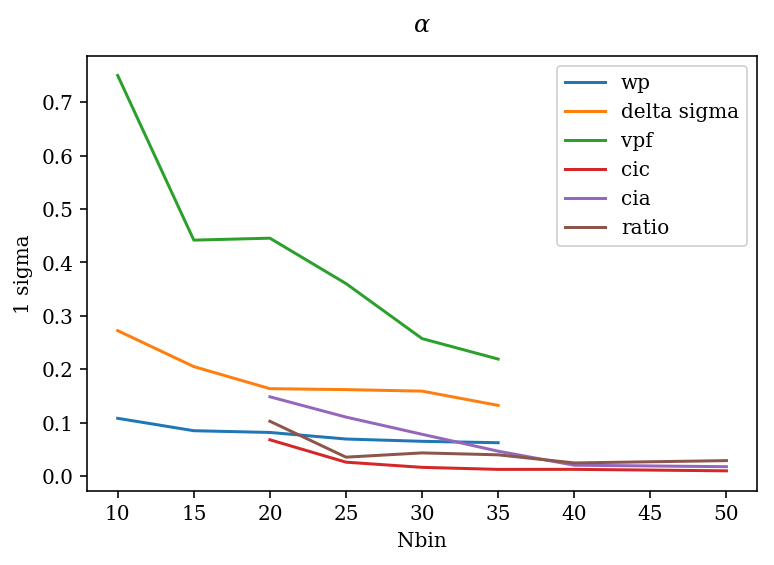

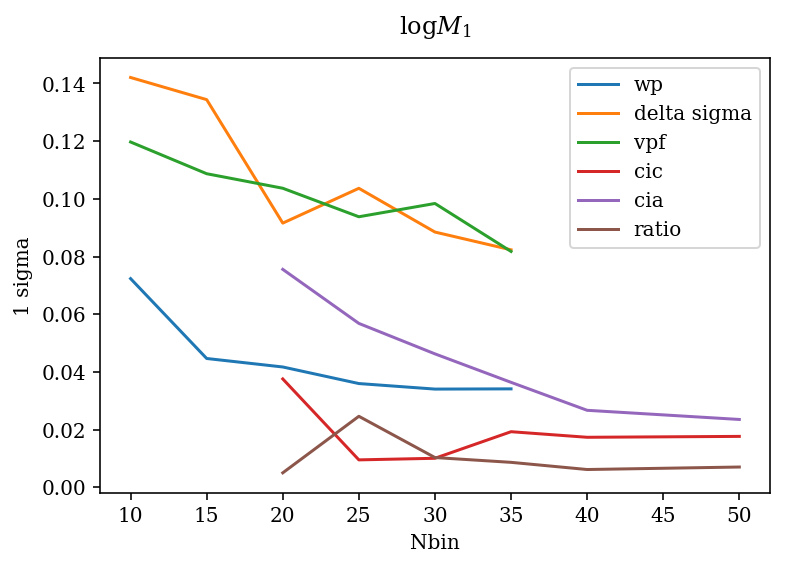

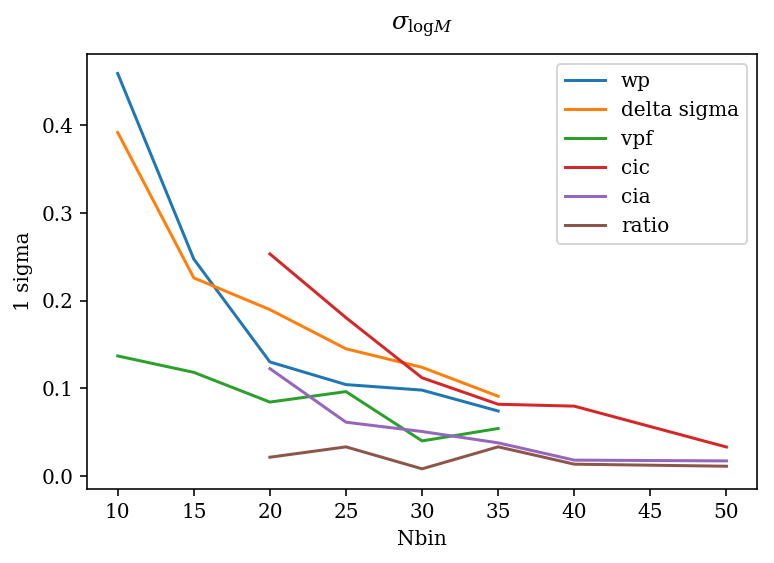

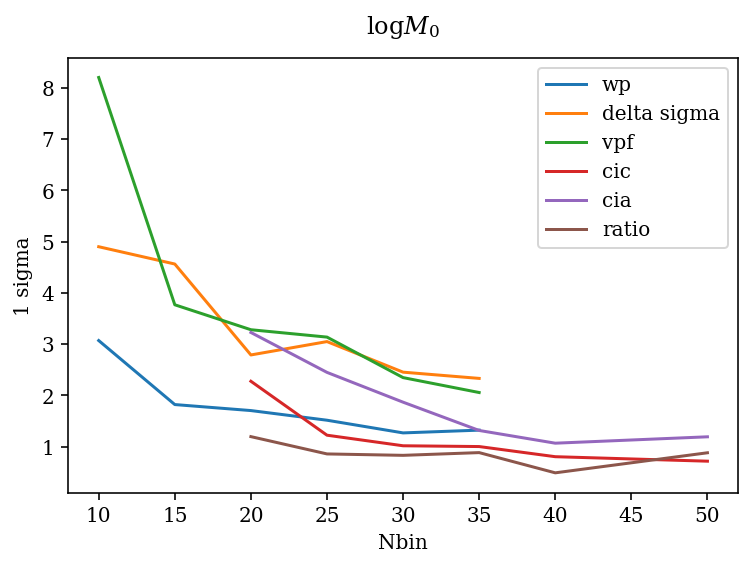

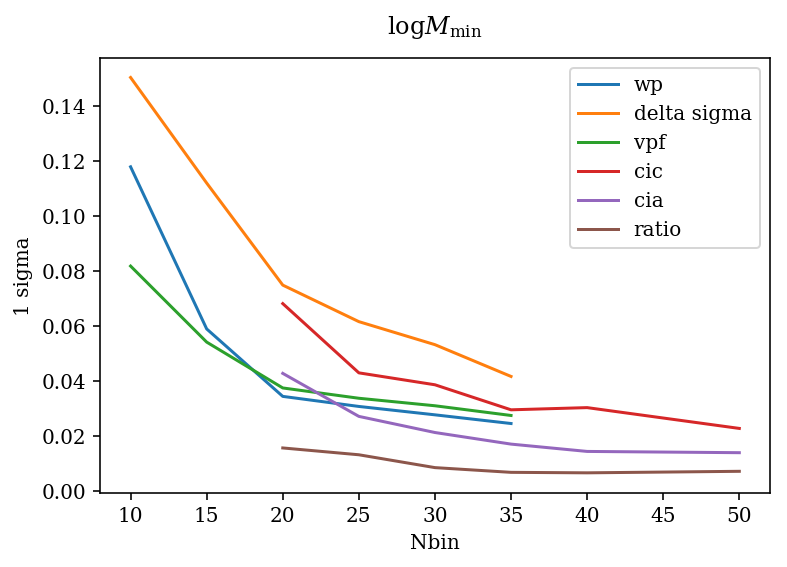

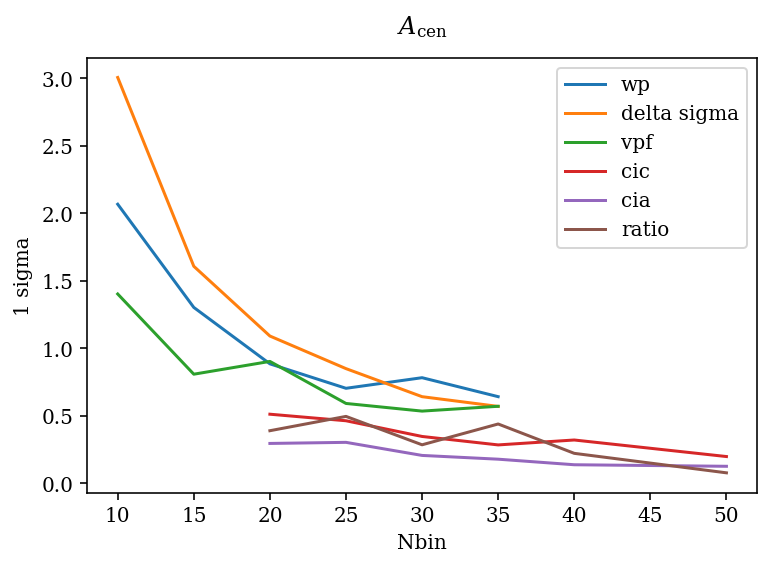

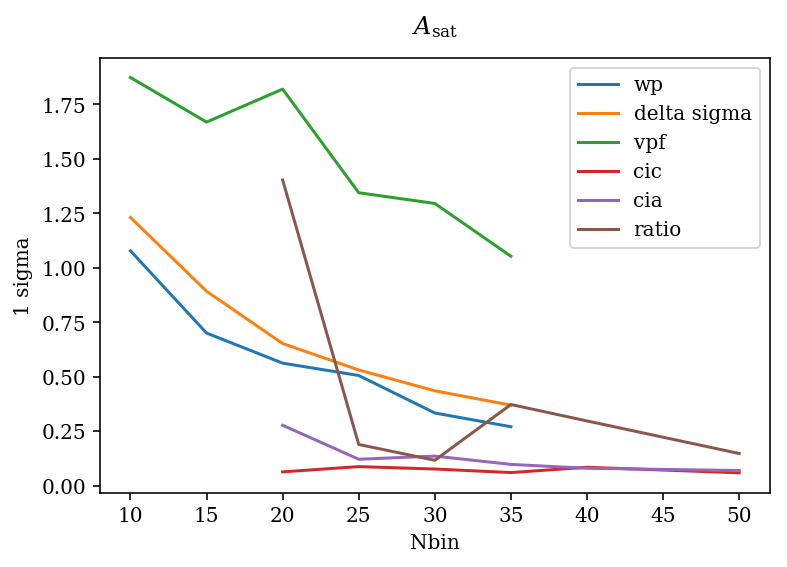

In [12]:
for i in range(7):
    plt.figure()
    plt.plot([10,15,20,25,30,35],sigmaw[:,i],label='wp')
    plt.plot([10,15,20,25,30,35],sigmad[:,i],label='delta sigma')
    plt.plot([10,15,20,25,30,35],sigmav[:,i],label='vpf')
    plt.plot([20,25,30,35,40,50],sigmac[:,i],label='cic')
    plt.plot([20,25,30,35,40,50],sigmaa[:,i],label='cia')
    plt.plot([20,25,30,35,40,50],sigmar[:,i],label='ratio')


    plt.title(param_list[i])
    plt.ylabel('1 sigma')
    plt.xlabel('Nbin')
    plt.legend()